# Agent Behabiour Classification

In [ ]:
from tweetnlp import TopicClassification, Sentiment, Irony, Hate, Offensive, Emotion, NER
import plotly.graph_objects as go

topic_model = TopicClassification()
sentiment_model = Sentiment()
irony_model = Irony()
hate_model = Hate()
offensive_model = Offensive()
emotion_model = Emotion()
entity_model = NER()

In [89]:
class TweetAnalysis:
    def update_layout(self, fig, title):
        fig.update_layout(
            title=title,
            xaxis_title='Labels',
            yaxis_title='Probabilities',
            yaxis_range=[0, 1],
            font=dict(size=14),
            margin=dict(l=40, r=40, t=60, b=80)
        )
        
    def plot_probabilities(self, title, data):
        probabilities = data['probability']
        fig = go.Figure([go.Bar(x=list(probabilities.keys()), y=list(probabilities.values()))])
        self.update_layout(fig, title)
        fig.show()


    # Function to create a combined bar chart
    def plot_combined_probabilities(self, title, data, xlabel='Labels', ylabel='Probabilities'):
        fig = go.Figure([go.Bar(x=list(data.keys()), y=list(data.values()))])
        self.update_layout(fig, title)
        fig.show()
        
    def run(self, tweet):
        self.plot_probabilities('Topic Classification Probabilities', topic_model.topic(tweet, return_probability=True))
        self.plot_probabilities('Sentiment Probabilities', sentiment_model.sentiment(tweet, return_probability=True))
        self.plot_probabilities('Emotion Probabilities', emotion_model.emotion(tweet, return_probability=True))

        combined_probs = {
            'Irony': irony_model.irony(tweet, return_probability=True)['probability']['irony'],
            'Hate': hate_model.hate(tweet, return_probability=True)['probability']['HATE'],
            'Offensive': offensive_model.offensive(tweet, return_probability=True)['probability']['offensive']
        }
        self.plot_combined_probabilities('Irony, Hate, Offensive Probabilities', combined_probs)
        
        ner_results = entity_model.ner(tweet, return_probability=True)
        ner_probs = {'probability': {f"{result['type']}: {result['entity']}": result['probability'] for result in ner_results}}
        self.plot_probabilities('Entity Identification', ner_probs)

In [90]:
tweetanalysis = TweetAnalysis()

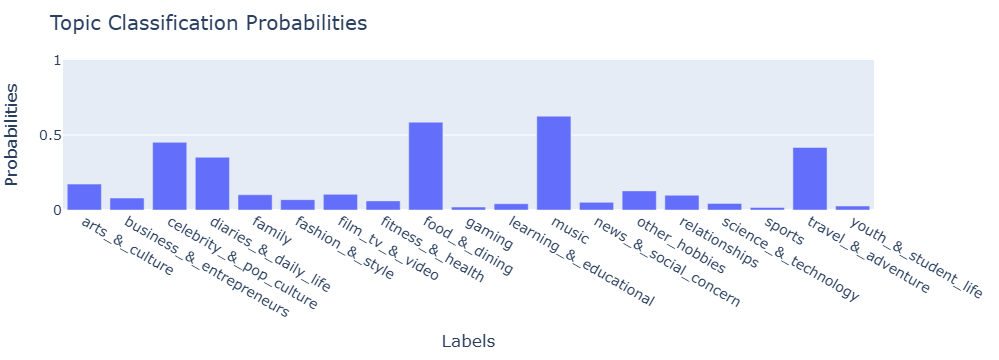

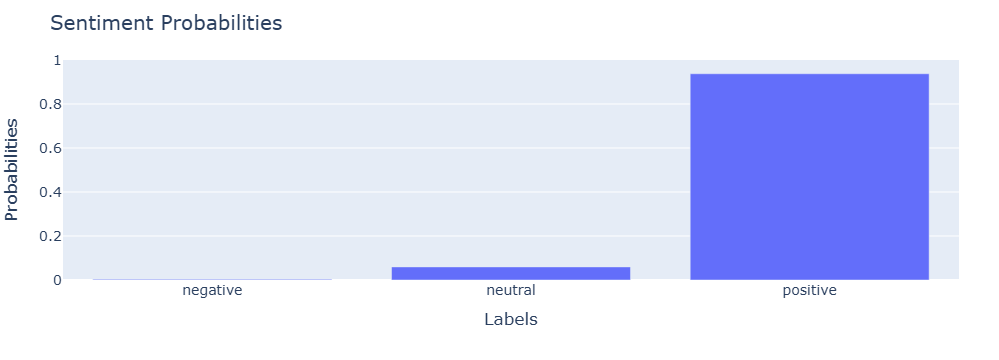

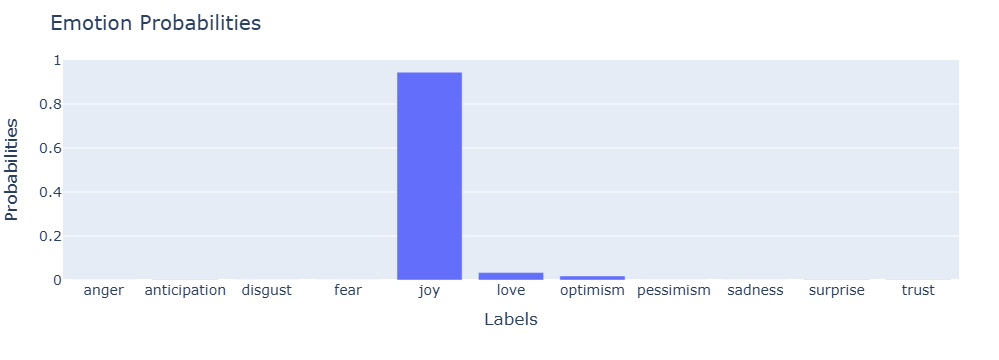

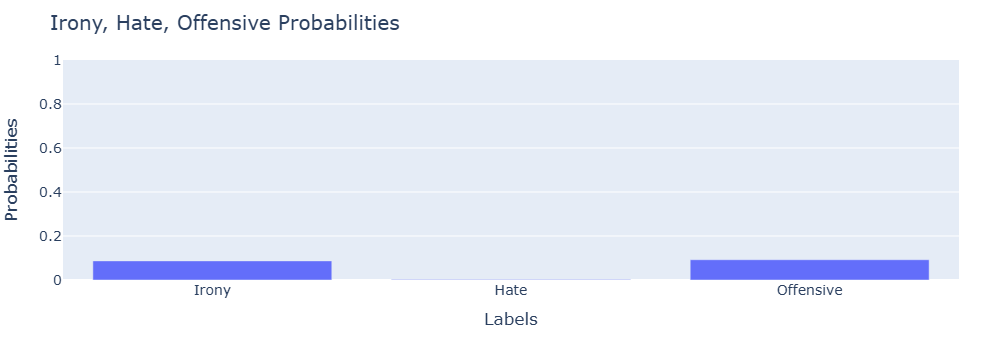

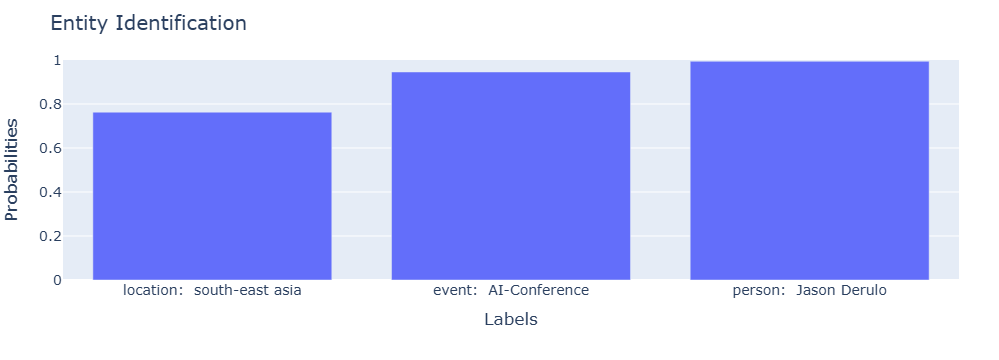

In [94]:
tweet="I would love to go to south-east asia, travel, eat some good meals, go the the AI-Conference and meet Jason Derulo"
tweetanalysis.run(tweet)